#### 3.5.2 Agglomerative (병합) Clustering
- 알고리즘 초기에 각 데이터 포인트 하나당 하나의 클러스터로 지정
- 이후 종료 조건이 만족할 때까지 가장 유사한 두 개의 클러스터를 병합
- scikit-learn의 종료조건
  - 지정된 개수의 클러스터 개수로 줄어들때 까지 수행
  - AgglomerativeClustering(n_clusters=3): 3개의 클러스터가 남게 됨
- linkage 옵션: 유사한 클러스터를 측정하는 방법 지정
  - ward
    - 병합될 클러스터내의 분산을 가장 적게 증가시키는 두 클러스터를 병합
  - average
    - 병합될 클러스터 포인트 사이의 평균 거리가 가장 짧은 두 클러스터를 병합 (it uses the average of the distances of each observation of the two sets)
  - complete
    - 병합될 클러스터 포인트 사이의 최대 거리가 가장 짧은 두 클러스터를 병합 (it uses the maximum distances between all observations of the two sets)
- 참고: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

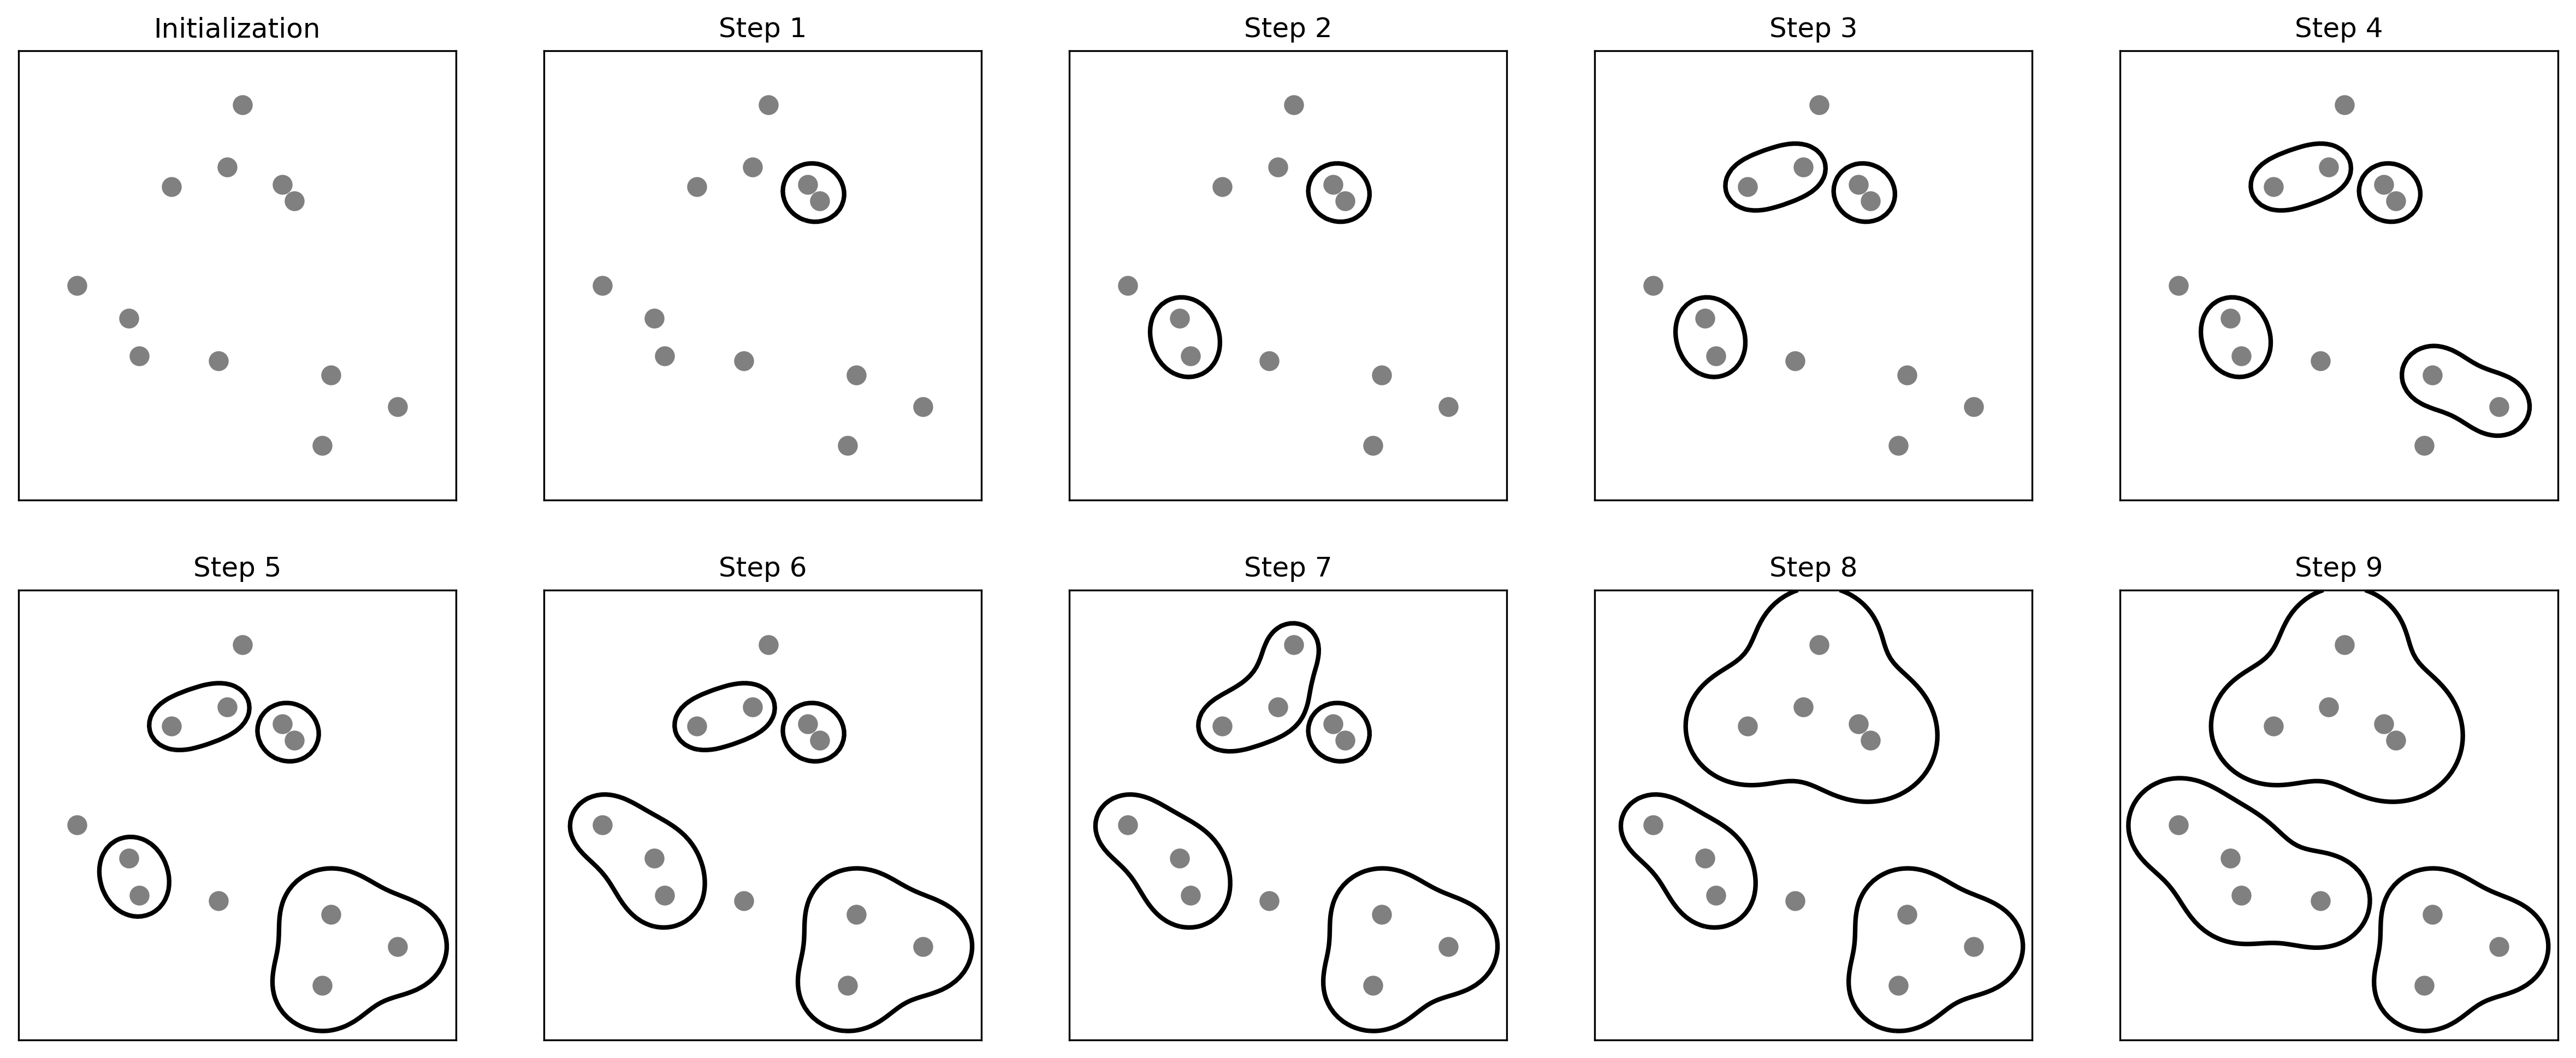

In [1]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *
mglearn.plots.plot_agglomerative_algorithm()

Text(0,0.5,'Feature 1')

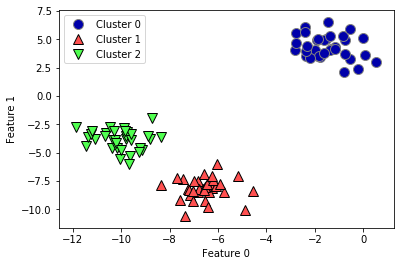

In [2]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

##### Hierarchical Clustering and Dendrograms
- 병합 클러스터링은 자연스럽게 계층적 클러스터링 기법이 된다. 
- 병합 클러스터링 알고리즘 수행 중간 단계에서는 각기 다른 개수의 클러스터를 생성함.

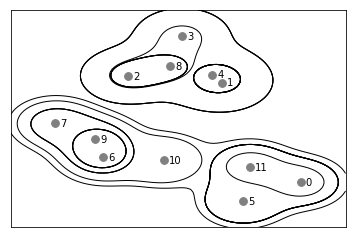

In [3]:
mglearn.plots.plot_agglomerative()

- Dendrogram
  - 계층 클러스터링 시각화 그래프
  - scikit-learn에서는 이 그래프를 그리는 기능 제공하지 않음
  - 대신 SciPy 패키지 사용 가능
    - linkage_array = ward(X)
      - 계층 군집의 유사도 및 클러스터링 단계를 포함하는 연결 배열 반환

In [4]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)

# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X)
print(linkage_array)

[[ 1.     4.     0.332  2.   ]
 [ 6.     9.     0.646  2.   ]
 [ 2.     8.     0.927  2.   ]
 [ 0.    11.     1.18   2.   ]
 [ 5.    15.     1.303  3.   ]
 [ 7.    13.     1.444  3.   ]
 [ 3.    14.     1.6    3.   ]
 [12.    18.     2.078  5.   ]
 [10.    17.     2.16   4.   ]
 [16.    20.     6.55   7.   ]
 [19.    21.     7.924 12.   ]]


Text(0,0.5,'Cluster distance')

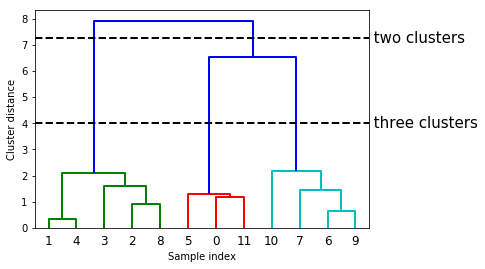

In [5]:
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")